# Task 8 K2S Band Analysis

### Download K2S information band structure

In [71]:
from pymatgen.ext.matproj import MPRester
import numpy as np

with MPRester("G0BptrHMmTXo23sw") as m:
    # Get the band structure data
    bandStructure = m.get_bandstructure_by_material_id("mp-1022")

## The K2S Band analysis will focus the following issue:
### 1. Gap band identification
### 2. Find the direction of:
####   a. the last valence band (min and max)
####   b. the first conduction band (min and max)
### 3. Provide the calculation of the effective mass at:
####   a. the top of the last valence band assuming a parabolic dispersion .
####   b. the base of the first conduction band assuming a parabolic dispersion .


### K2S Electronique band figure with information on max VBM and min CBM points

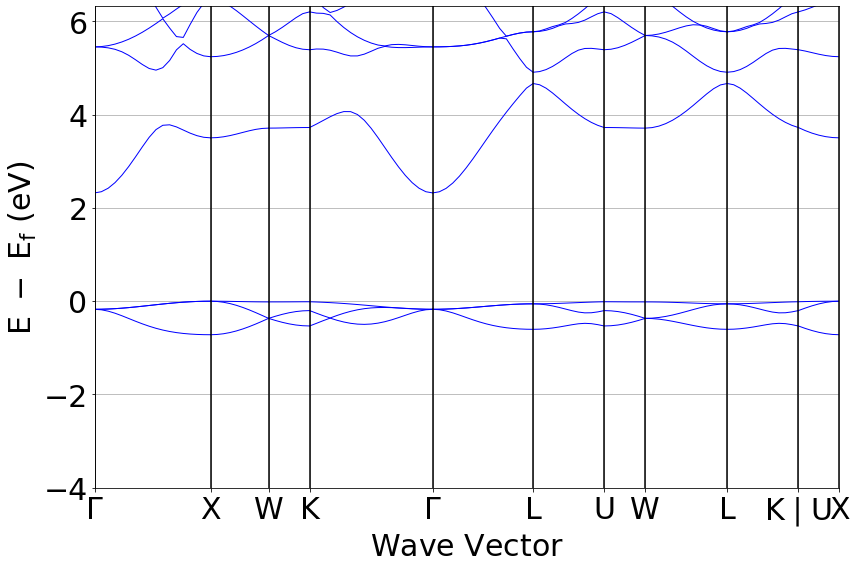

In [72]:
# Electronique band figure
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter

BSPlotter(bandStructure).get_plot(vbm_cbm_marker = False, zero_to_efermi = True)
plt.grid()

In [73]:
nrBands = bandStructure.nb_bands
print("Number of bands:\t", nrBands)
print("Fermi energy, Ef:\t", bandStructure.efermi, "eV")

Number of bands:	 28
Fermi energy, Ef:	 -0.36843885 eV


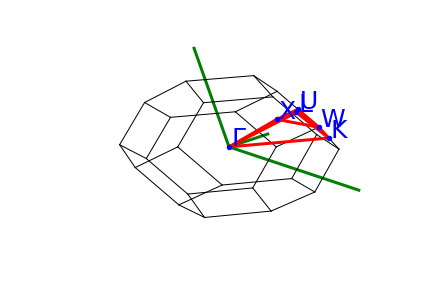

In [74]:
# Brillouin zone with the path used for the band structure,
# in particular the position of the different wave vector 
# can be obseved
# See https://en.wikipedia.org/wiki/Brillouin_zone
BSPlotter(bandStructure).plot_brillouin()


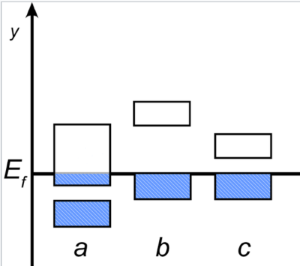
##### a. metal, b. non-conductor, c. semiconductor

### 1. Gap band Identification and main features

In [75]:

K2SgapBand = bandStructure.get_band_gap()

K2Sefermi = bandStructure.efermi
print("Gap band energy: ", K2SgapBand['energy'], "eV")
print("Fermi energy:\t", round(K2Sefermi, 3), "eV")
"""
# Alternative code #
if((bandStructure.is_metal(K2Sefermi)) == True):
    answer = "yes"
else: 
    answer = "no"
print("K2S has a metal behavior:  ", answer)
"""
print("K2S has a metal behavior:  ", bandStructure.is_metal(K2Sefermi))


Gap band energy:  2.322 eV
Fermi energy:	 -0.368 eV
K2S has a metal behavior:   True


In [76]:
K2Scbm = bandStructure.get_cbm()
print("K2S Conduction Band Minimun: ",K2Scbm['energy'], "eV")
print("K2S Min Conduction Band number: ", K2Scbm['band_index'])
K2Svbm = bandStructure.get_vbm()
print("\nK2S Valence Band Maximum:\t", K2Svbm['energy'], "eV")
print("K2S Max Valence Band number: ", K2Svbm['band_index'])
#print(K2Scbm['energy']-K2Svbm['energy']) # check correctness of band gap energy
K2Svbm.keys()


K2S Conduction Band Minimun:  1.8972 eV
K2S Min Conduction Band number:  defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})

K2S Valence Band Maximum:	 -0.4248 eV
K2S Max Valence Band number:  defaultdict(<class 'list'>, {<Spin.up: 1>: [10, 11]})


dict_keys(['band_index', 'kpoint_index', 'kpoint', 'energy', 'projections'])

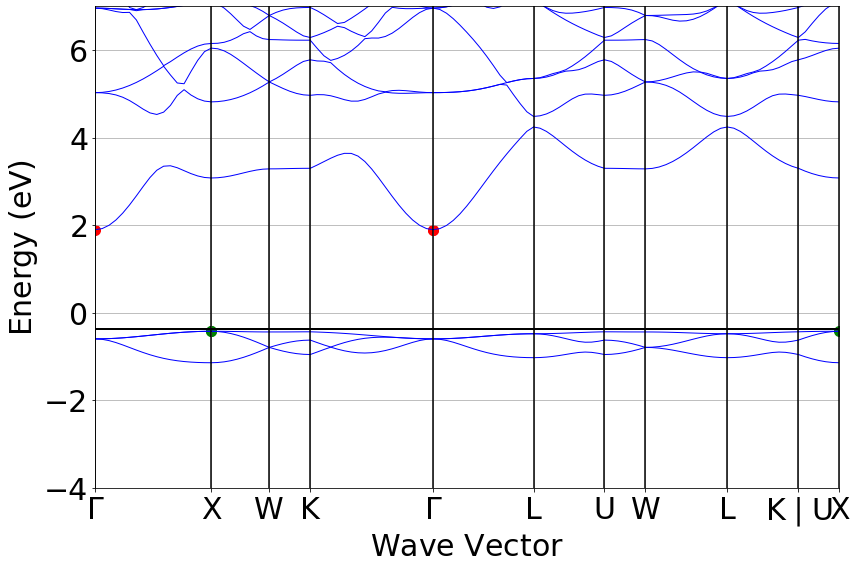

In [77]:
BSPlotter(bandStructure).get_plot(vbm_cbm_marker = True, ylim=(-4.0 ,7.0), zero_to_efermi = False)
"""
The Fermi levels are either at the valence band maximum (VBM) or the conduction band minimum (CBM),
with the boolean "vbm_cbm_marker" set to "True" is put in evidence the max and min of Fermi levels
"""
plt.grid()


#### Details of gap band

Text(0.5, 1, 'Detail of K2S Gap Band Structure')

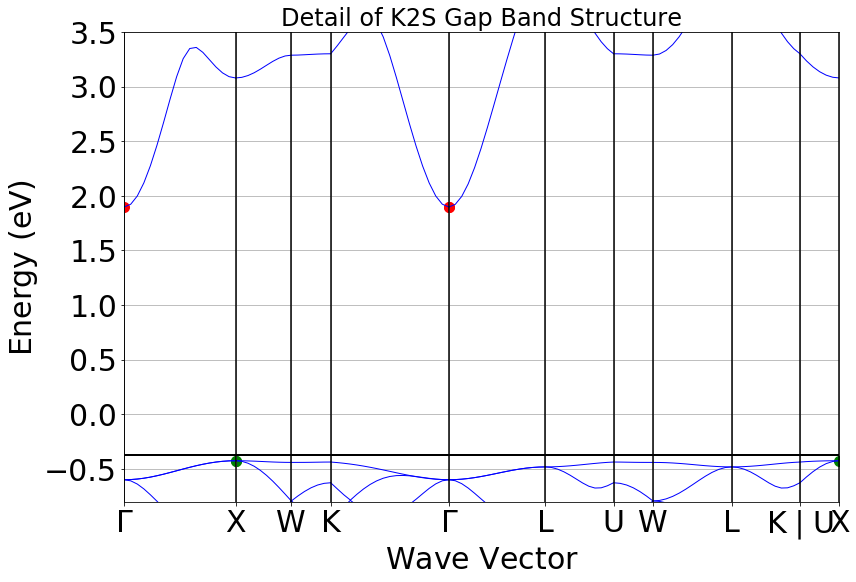

In [78]:
BSPlotter(bandStructure).get_plot(zero_to_efermi=False, ylim=(-0.8,3.5), vbm_cbm_marker=True, smooth_tol=False)
plt.grid()
ax = plt.gca()
ax.set_title("Detail of K2S Gap Band Structure", fontsize=24)

### 2. Dispersion & direction of the last valence band and the first conduction band - (min/max)

In [79]:
# Data extraction and preparation
tickData = BSPlotter(bandStructure).get_ticks()
print(tickData.keys(), "\n")
K2Sdistance = tickData.get('distance')
print(len(K2Sdistance), "\n")
print("Distance:\n", K2Sdistance, "\n")
print(tickData.get('label'))

dict_keys(['distance', 'label']) 

19 

Distance:
 [0.0, 0.8417319134360708, 0.8417319134360708, 1.2625978701541059, 1.2625978701541059, 1.5601950421199928, 1.5601950421199928, 2.4529865580176793, 2.4529865580176793, 3.1819477782293992, 3.1819477782293992, 3.697401200263132, 3.697401200263132, 3.9949983722290194, 3.9949983722290194, 4.590192716160792, 4.590192716160792, 5.1056461381945235, 5.403243310160419] 

['$\\Gamma$', 'X', 'X', 'W', 'W', 'K', 'K', '$\\Gamma$', '$\\Gamma$', 'L', 'L', 'U', 'U', 'W', 'W', 'L', 'L', 'K$\\mid$U', 'X']


In [80]:
bs = BSPlotter(bandStructure)
K2Sdata = bs.bs_plot_data()
#print(K2Sdata.keys())
#print(K2Sdata.get('energy').get('1'))
print("K2S has a metal behavior:  ", K2Sdata.get('is_metal'))
 # It seems to be inconsistent with the similar query above: "bandStructure.is_metal(K2Sefermi)" 
 # in section "Gap band Identification and main features"

K2S has a metal behavior:   False


#### Identify the last valence band and the next one corresponding to the first conduction band to calculate dispersion and direction

In [81]:
# Get all dictionary keys
bs = BSPlotter(bandStructure)

# Calculate the middle of the gap band
middleGapBand = (K2Scbm['energy'] - K2Svbm['energy'])/2
print("middle of the gap band", middleGapBand)

# Get all band energies
K2Senergies = K2Sdata.get('energy')

for maxEnergy in range(0, nrBands):
    # Get the first column elements of the energy matrix () in the dictionary key '1' 
    conductionEnergy = K2Senergies[0].get('1')[maxEnergy][0]
    if(K2Senergies[0].get('1')[maxEnergy][0]) > middleGapBand:
        conductionIndex = maxEnergy
        conductionEnergy = K2Senergies[0].get('1')[maxEnergy][0]
        break

valenceEnergy = K2Senergies[0].get('1')[maxEnergy-1][0] 
print("Min condution energy: ", conductionEnergy, "  level: ", maxEnergy,"\t", \
      "Max valence energy: ", valenceEnergy, "  level: ", maxEnergy-1)
# Get 'ticks' elements
#(K2Sdata.get('zero_energy'))


middle of the gap band 1.161
Min condution energy:  2.322   level:  12 	 Max valence energy:  -0.174   level:  11


#### Calculation of minimum and maximum dispersion 

In [82]:
# Get the distances among kpoint
K2Sdistance
#print(K2Sdistance,"\n") # Check distance list elements

kpointDistances = [] # initialise 
i = 0
nrPoints = len(K2Sdistance)
#print("Nr. of points:", nrPoints) # Test
for d in range(1, nrPoints):
    if(K2Sdistance[d] != K2Sdistance[d-1]): # Skip equal values
        kp = K2Sdistance[d] - K2Sdistance[d-1]
        kpointDistances.append(kp)
print(kpointDistances)
print("\nNr. of segments (distances):", len(kpointDistances))

[0.8417319134360708, 0.42086595671803506, 0.297597171965887, 0.8927915158976865, 0.7289612202117199, 0.5154534220337328, 0.2975971719658874, 0.5951943439317726, 0.5154534220337315, 0.2975971719658954]

Nr. of segments (distances): 10


In [83]:
"""
Extract energy segments for min condution energy band (nr. 12) 
and for max valence energy (nr. 11 and 10). 
For the sake of simplicity the band nr. 11 is selected
"""
minConductionBandNr = maxEnergy
maxValenceBandNr = maxEnergy-1
# Create a list of band energies to simplify the slope calculations
minConductionBand = []
maxValenceBand = []
for i in range(0, 10):
    minConductionBand.append(K2Senergies[i].get('1')[minConductionBandNr][0])
    maxValenceBand.append(K2Senergies[i].get('1')[maxValenceBandNr][0])

# append last points to complete the lists
# print(i) #Test
minConductionBand.append(K2Senergies[i].get('1')[minConductionBandNr][-1]) 
maxValenceBand.append(K2Senergies[i].get('1')[maxValenceBandNr][-1])

NrEnergypoints = len(maxValenceBand)
# print(NrEnergypoints) #Test
print("Min ConductionBand Nr. ",minConductionBandNr, "\nMin condution energy band points:\n",minConductionBand)
print("\nMax Valence Band Nr. ", maxValenceBandNr, "\nMax valence energy band points:\n", maxValenceBand)

# Calculate energy segments using MCB and MVB points
mcbSegments = []
mvbSegments = []
for e in range(1, NrEnergypoints):
    mcbSegments.append(minConductionBand[e-1] - minConductionBand[e])
    mvbSegments.append(maxValenceBand[e-1] - maxValenceBand[e])
    
    
# Calculate dispersion slope for MCB and MVB
MCBdispersion = []
MVBdispersion = []

for i in range(0, NrEnergypoints-1):
    # MCB slope Calculation
    MCBdispersion.append(mcbSegments[i]/kpointDistances[i])
    # MVB slope Calculation
    MVBdispersion.append(mvbSegments[i]/kpointDistances[i])

print("\nSet of Minimum Conduction Band slopes\n", MCBdispersion)
print("\nSet of Minimum Valence Band slopes\n", MVBdispersion)


Min ConductionBand Nr.  12 
Min condution energy band points:
 [2.322, 3.5031999999999996, 3.7116, 3.7245999999999997, 2.322, 4.6684, 3.7245999999999997, 3.7116, 4.6684, 3.7245999999999997, 3.5031999999999996]

Max Valence Band Nr.  11 
Max valence energy band points:
 [-0.174, 0.0, -0.015500000000000014, -0.0121, -0.174, -0.05669999999999997, -0.0121, -0.015500000000000014, -0.05669999999999997, -0.0121, 0.0]

Set of Minimum Conduction Band slopes
 [-1.4032971557157328, -0.4951695347970864, -0.043683210811862376, 1.571027473967099, -3.2188269210240157, 1.8310092816460832, 0.043683210811862314, -1.6075421578765519, 1.831009281646088, 0.7439586825958563]

Set of Minimum Valence Band slopes
 [-0.20671664840377377, 0.0368288281638908, -0.01142483975079491, 0.1813413289856505, -0.16091390974945324, -0.08652576177306127, 0.011424839750794892, 0.06922108790187484, -0.0865257617730615, -0.04065898852488645]


In [84]:
#
SegmentLabel = ['Gamma->X', 'X->W', 'W->K', 'K->Gamma', 'Gamma->L', 'L->U', 'U->W', 'W->L', 'L->K|U', 'K|U->X']
maxMCBdispersion = max(MCBdispersion)
minMCBdispersion = min(MCBdispersion)
maxMVBdispersion = max(MVBdispersion)
minMVBdispersion = min(MVBdispersion)

maxMCBispersionIdx = MCBdispersion.index(maxMCBdispersion)
minMCBispersionIdx = MCBdispersion.index(minMCBdispersion)
maxMVBispersionIdx = MVBdispersion.index(maxMVBdispersion)
minMVBispersionIdx = MVBdispersion.index(minMVBdispersion)

print("Max Conduction dispersion => Label with direction:",SegmentLabel[maxMCBispersionIdx], "\tSlope value:",maxMCBdispersion)
print("Min Conduction dispersion => Label with direction:",SegmentLabel[minMCBispersionIdx], "\tSlope value:",minMCBdispersion)
print("\nMin Valence dispersion    => Label with direction:",SegmentLabel[maxMVBispersionIdx], "\tSlope value:",maxMVBdispersion)
print("Max Valence dispersion    => Label with direction:",SegmentLabel[minMVBispersionIdx], "\tSlope value:",minMVBdispersion)

Max Conduction dispersion => Label with direction: L->K|U 	Slope value: 1.831009281646088
Min Conduction dispersion => Label with direction: Gamma->L 	Slope value: -3.2188269210240157

Min Valence dispersion    => Label with direction: K->Gamma 	Slope value: 0.1813413289856505
Max Valence dispersion    => Label with direction: Gamma->X 	Slope value: -0.20671664840377377


#### Figure showing with arrows the max and min dispersion in min condution and max valence bands

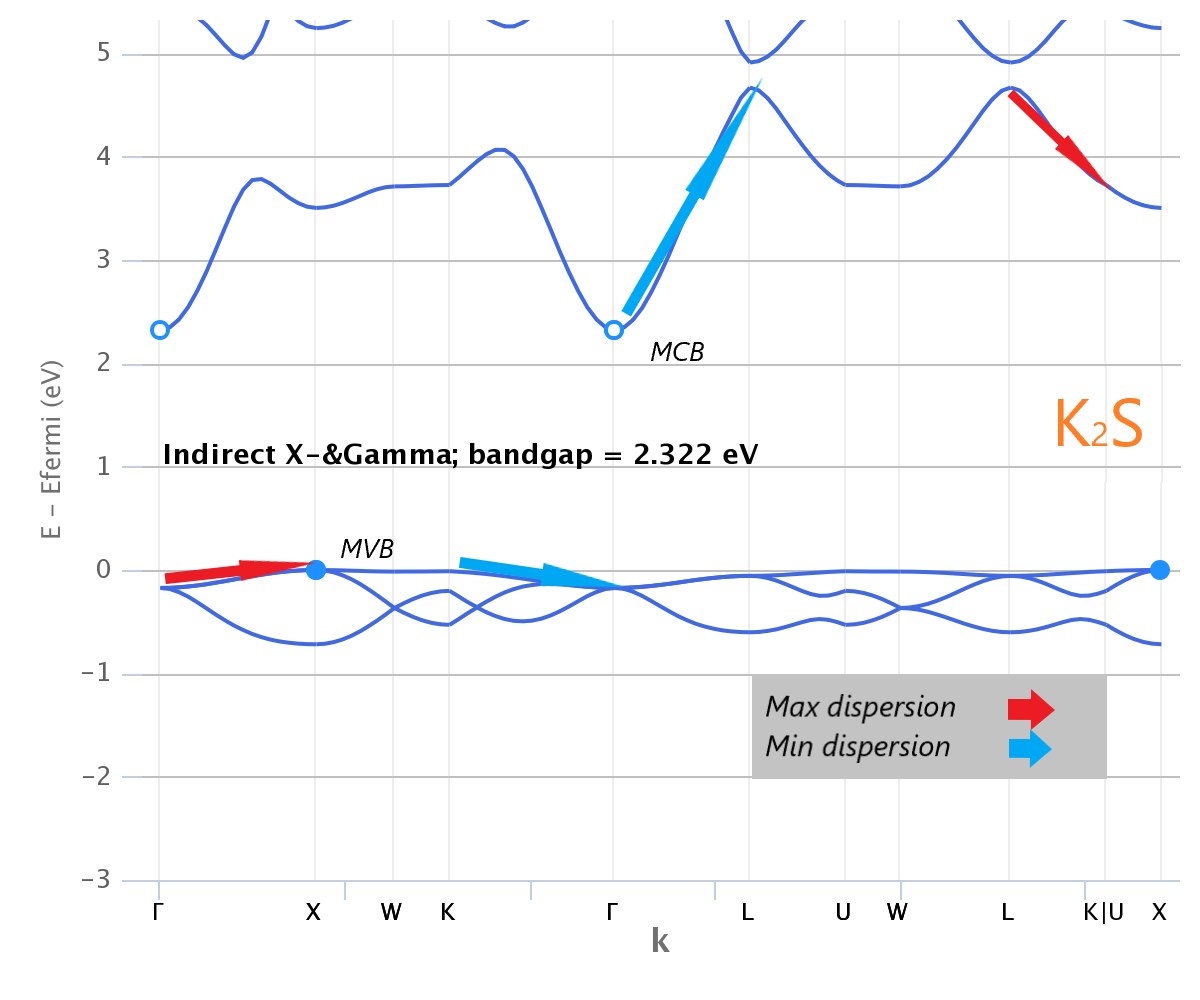

In [85]:
# TESTING CODE

In [86]:
# Code for testing purposes
print(K2Senergies[4].get('1')[minConductionBandNr])
print(K2Senergies[5].get('1')[minConductionBandNr])
#print(K2Senergies[4].get('1')[maxValenceBandNr])

[2.322, 2.3468, 2.4191, 2.5334, 2.6824999999999997, 2.8579, 3.0515, 3.2555, 3.4627, 3.6671, 3.8645, 4.0531, 4.2333, 4.4064, 4.569500000000001, 4.6684]
[4.6684, 4.6413, 4.5681, 4.4656, 4.3492, 4.2298, 4.1146, 4.0084, 3.9143999999999997, 3.8348999999999998, 3.7712999999999997, 3.7245999999999997]


In [87]:
# Code for testing purposes
print("Valence - VBM")
print("Number of points Gamma-X: ",len(K2Sdata.get('distances')[0])) 
print(K2Sdata.get('distances')[0], "\n") 
print("Number of points X-W: ",len(K2Sdata.get('distances')[1])) 
print(K2Sdata.get('distances', "\n")[1]) 
print("\nConduction - CBM")
print("Number of points K-Gamma: : ",len(K2Sdata.get('distances')[3])) 
print(K2Sdata.get('distances')[3], "\n") 
print("Number of points Gamma-L: ",len(K2Sdata.get('distances')[4])) 
print(K2Sdata.get('distances')[4], "\n") 

Valence - VBM
Number of points Gamma-X:  18
[0.0, 0.049513634044644976, 0.09902728492392822, 0.1485409189685732, 0.19805456984785644, 0.24756820389250145, 0.29708185477178467, 0.34659548881642965, 0.3961091396957129, 0.4456227737403579, 0.49513642461964114, 0.5446500586642862, 0.5941637095435693, 0.6436773435882143, 0.6931909944674975, 0.7427046285121426, 0.7922182793914258, 0.8417319134360708] 

Number of points X-W:  10
[0.8417319134360708, 0.8884948012568832, 0.9352576890776956, 0.9820205600638698, 1.0287834478846822, 1.0755463357054946, 1.122309223526307, 1.169072094512481, 1.2158349823332935, 1.2625978701541059]

Conduction - CBM
Number of points K-Gamma: :  19
[1.5601950421199928, 1.6097945747489368, 1.6593940954739963, 1.7089936281029405, 1.7585931607318848, 1.8081926814569442, 1.8577922140858885, 1.9073917467148327, 1.9569912674398922, 2.006590800068836, 2.0561903326977804, 2.1057898534228396, 2.155389386051784, 2.204988918680728, 2.2545884394057873, 2.3041879720347316, 2.35378

### 3a. Effective mass calculation in the upper part of the last valence band assuming a parabolic dispersion

The effective mass of the electron (m*) in the crystal is generally
different from the mass of the free electron (0.911x10-30kg). 
The estimation of m* can is based on the following equation:
m* = (h/2⋅pi)^2/(d2E/d2k)  (d2E/d2k second derivative).

Assuming an energy parabolic dispersion:
E(k) = a⋅k^2 + b⋅k + c

The second derivative is E"(k) = 2a, thus:

m* = ((h/2⋅pi)^2)/2a          where h-bar is (h/2⋅pi) = 1.054571817×10−34 J⋅s

m* = (1.054571817×10−34)^2 / 2a (kg)

In particular, as far as concerns the parabolic model: 'narrow' parabola present small effective masses (light) wider parabola has large effective masses (heavy).
    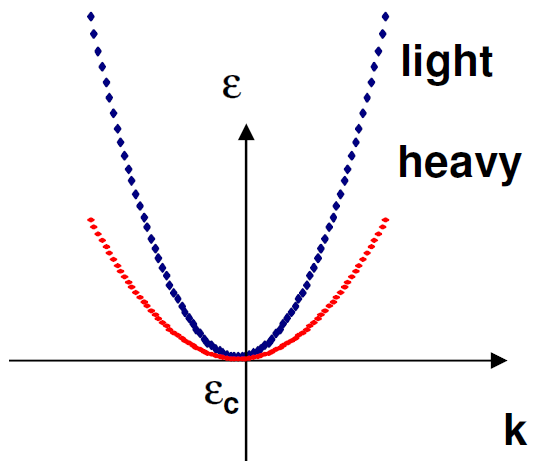
    
sorces: [1] https://fr.qwe.wiki/wiki/Effective_mass_%28solid-state_physics%29
        [2] http://folk.uio.no/ravi/FME2011/lectures/Lecture2-2-ravi_effectivemass.pdf

In [88]:
# Coordinates of (distance, energy) [1] of max valence band point (i.e. x,y)
#print("Data dictionary keys\n",K2Sdata.keys(),"\n") #test

# Valence - Band nr.11 K-point => 0, i.e. "X"
K2Sdistance = K2Sdata.get('distances')

# Initialise x and y vectors (3 coordinates)
k_valence = np.zeros(3)
E_valence = np.zeros(3)

In [89]:
#print(K2Sdata.get('vbm')) #test

vbmCoordinates = K2Sdata.get('vbm')
(k_valence[1], E_valence[1]) = vbmCoordinates[1]
print("vbm coordinates-central point",(k_valence[1], E_valence[1]))

print("Valence points around vbm:")
(k_valence[0], E_valence[0]) = (K2Sdistance[0][-3], K2Senergies[0].get('1')[11][-3])
print("On vbm left", (k_valence[0], E_valence[0]))

(k_valence[2], E_valence[2]) = (K2Sdistance[1][2], K2Senergies[1].get('1')[11][2])
print("On vbm rigth", (k_valence[2], E_valence[2]))

vbm coordinates-central point (0.8417319134360708, 0.0)
Valence points around vbm:
On vbm left (0.7427046285121426, -0.005500000000000005)
On vbm rigth (0.9352576890776956, -0.0019000000000000128)


In [90]:
# Construction of pararolic valence dispersion through the 3 points previously calculated
(a,b,c) = np.polyfit(k_valence, E_valence, 2)
print ("a⋅k^2 + b⋅k + c :  ","a =",  a, "  b =", b,"  c =",c)

a⋅k^2 + b⋅k + c :   a = -0.3939459770052168   b = 0.6797226498897299   c = -0.29302855271665496


In [91]:
# VBM EFFECTIVE MASS
# h_bar value => 6.582119569×10−16 eV⋅s or 1.054571817×10−34 J⋅s
from scipy.constants import hbar
print("h-bar value:", hbar, "J⋅s\n")

vbm_effective_mass = (hbar**2)/2*a
print("The VBM effective mass is: ", vbm_effective_mass, "Kg")

h-bar value: 1.0545718001391127e-34 J⋅s

The VBM effective mass is:  -2.1905793121288077e-69 Kg


### 3b. Effective mass calculation on the lower part of the first conduction band assuming a parabolic dispersion 

In [92]:
# Coordinates of (distance, energy) [1] of min conduction band point (i.e. x,y)
#print("Data dictionary keys\n",K2Sdata.keys(),"\n") #test

# Conduction - Band nr.12 K-point => "Gamma"
K2Sdistance = K2Sdata.get('distances')

# Initialise x and y vectors (3 coordinates)
k_conduction = np.zeros(3)
E_conduction = np.zeros(3)

In [93]:
#print(K2Sdata.get('cbm')) #test

cbmCoordinates = K2Sdata.get('cbm')
(k_conduction[1], E_conduction[1]) = cbmCoordinates[1]
print("cbm coordinates-central point",(k_conduction[1], E_conduction[1]))

print("Conduction points around cbm:")
(k_conduction[0], E_conduction[0]) = (K2Sdistance[3][-3], K2Senergies[3].get('1')[12][-3])
print("On cbm left", (k_conduction[0], E_conduction[0]))

(k_conduction[2], E_conduction[2]) = (K2Sdistance[4][2], K2Senergies[4].get('1')[12][2])
print("On cbm rigth", (k_conduction[2], E_conduction[2]))

cbm coordinates-central point (2.4529865580176793, 2.322)
Conduction points around cbm:
On cbm left (2.353787504663676, 2.4231)
On cbm rigth (2.5501813922389833, 2.4191)


In [94]:
# Construction of pararolic conduction dispersion through the 3 points previously calculated
(a,b,c) = np.polyfit(k_conduction, E_conduction, 2)

print ("a⋅k^2 + b⋅k + c :  ","a =",  a, "  b =", b,"  c =",c)

a⋅k^2 + b⋅k + c :   a = 10.27622225836847   b = -50.414641565351324   c = 64.15493870568092


In [95]:
# CBM EFFECTIVE MASS
# h_bar value => 6.582119569×10−16 eV⋅s or 1.054571817×10−34 J⋅s
from scipy.constants import hbar
print("h-bar value:", hbar, "J⋅s\n")

cbm_effective_mass = (hbar**2)/2*a
print("The CBM effective mass is: ", cbm_effective_mass, "Kg")

h-bar value: 1.0545718001391127e-34 J⋅s

The CBM effective mass is:  5.714204789486008e-68 Kg
